## The Battle of the Neighborhoods

###  Chinese Restaurants Food Delivery platform


#### Yung Kwan

### Introduction

Toronto is the provincial capital of the province of Ontario, and is the most populous city in Canada. It is known to have huge populations of immigrants and ethnic enclaves. 

At the most recent (2016) census, the wider Greater Toronto Area (GTA) population was 6,417,516. This makes the GTA the largest metropolitan area in Canada and the seventh largest metropolitan area in North America. 

### Business Problem
According to the latest census, there are 332,830 ethnic Chinese in the city of Toronto. It’s the largest ethnic origin in Toronto. There are well over 120,000 ethnic Chinese living in the Scarborough borough itself. It is the most populous borough for ethnic Chinese in Toronto. 

With the huge ethnic Chinese population in Toronto area, plus a constant influx of Chinese students, immigrants and tourists within the area , a business start up is looking to setup a food delivery platform for the Chinese speaking segment, with the aim to expand to other Asian ethnic groups like Korean and Japanese.  Unlike other food delivery platform such as UberEats or DoorDash, this platform will feature some distinguish features that would be attracted to its future users and potential restaurants partner.

a.	Provide a Chinese interface on the ordering app, both the menu and its order itself can be in Chinese language. That’s a critical feature for Chinese users as a lot of English menus in restaurants are vary difference from the Chinese ones. A lot of food items are not available on English menu. This feature would attract Chinese users over other existing food delivery platforms.

b.	Non English speaking Chinese cooks and staffs work in the restaurant can read the orders by themselves in Chinese. This can prevent those lost in translation errors and minimize ordering errors.  A huge convenience for Chinese speaking restaurant owners and cooks. It is a bonus in comparing to other platforms that only give out orders in English.

c.	Beside credit cards, the platform will setup a payment options that are hugely popular by mainland Chinese students, immigrants and Chinese visitors, namely the Wechat Pay and Alipay. The Chinese payment options would bring additional segment of customers to the platform. That’s another incentive for restaurants owner to join the network. 

### Target audience 

This project will do a demographical and location based analysis, and will become part of market analysis for the startup to choose which neighborhood or borough to be start up with building up their restaurants network. Before this analysis, the company is considering to target restaurants in the Scarborough borough area first as it has the largest Chinese population resides there. This project will help the company to better understand the distribution of Chinese restaurants within the City and whether it is viable to start the network in most populous borough only.



### Import libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
from IPython.display import display
pd.options.display.max_columns = None
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


### Scrape Wikipedia data for Toronto PostalCode and transforms to dataframe

It scrape wiki and for Toronto postal code. Clean the data and merge it with CSV that contains the coordingates of those postal code.


In [2]:
# scrape wiki data for Toronto postalcode and tranform it into a Pandas DataFrame


# use pd.read_html to read in the table and transforms to a dataframe
pd.set_option('display.max_rows', None)
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')[0]
df.rename(columns={'Neighbourhood':'Neighborhood'}, inplace=True)

# drop the row with Not Assigned value in Borough 
df_tor = df[(df['Borough'] !='Not assigned') ]

# drop the row with Not Assigned value in Neighborhood 
df_tor = df[(df['Neighborhood'] !='Not assigned') ]

# Merge the same postal code rows, the neighborhood are joined by comma
df_tor = df_tor.groupby(['Postcode','Borough'])['Neighborhood'].apply(', '.join).reset_index()

# read Geo-spatial data
dftemp= pd.read_csv("http://cocl.us/Geospatial_data")
dftemp.rename(columns={'Postal Code':'Postcode'}, inplace=True)
dftemp.set_index("Postcode")
df_tor.set_index("Postcode")

# merge the dataframe with Geo-spatial data
toronto_geo=pd.merge(df_tor, dftemp)
print('shape of dataframe: {}'.format(toronto_geo.shape))
toronto_geo


shape of dataframe: (102, 5)


,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


### Create a map of Toronto with neighborhoods superimposed on top

In [3]:
#get the coordinates for Toronto
address = 'Toronto,ON, Canada'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Toronto are 43.653963, -79.387207.


In [4]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto_geo['Latitude'], toronto_geo['Longitude'], toronto_geo['Borough'], toronto_geo['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

### Neighborhoods per borough

With the Toronto neeighborhoods dataframe, let’s start analyzing it. First, to find out which borough has the most neighborhoods.

In [5]:
# let's explore how many neighborhoods for each of the borough

nhoods_perBorough = toronto_geo.groupby('Borough')['Neighborhood'].count()
nhoods_perBorough

Borough
Central Toronto      9
Downtown Toronto    19
East Toronto         5
East York            5
Etobicoke           11
Mississauga          1
North York          24
Scarborough         17
West Toronto         6
York                 5
Name: Neighborhood, dtype: int64

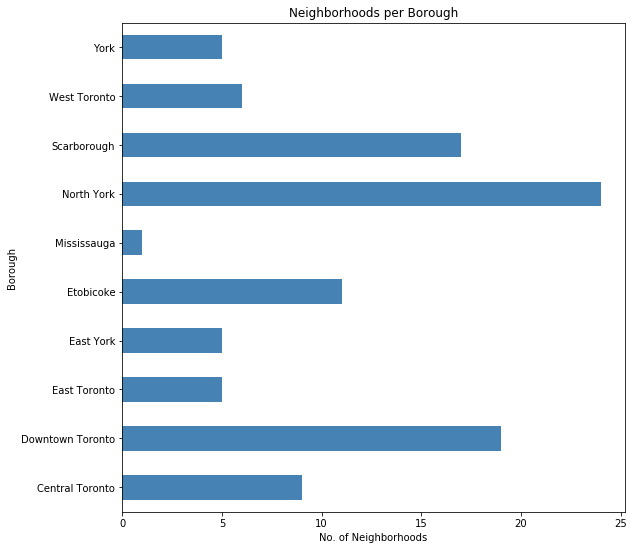

In [6]:
nhoods_perBorough.plot(kind='barh',figsize=(9,9), color='steelblue')
plt.xlabel('No. of Neighborhoods') # add to x-label to the plot
plt.ylabel('Borough') # add y-label to the plot
plt.title('Neighborhoods per Borough') # add title to the plot
plt.show()

We can see the borough of “Downtown Toronto”, “York” and “Scarborough” have the most neighborhoods within its boundary.  

Now we need to find out how many Chinese restaurants in each of the borough. We will use the Foursqare API for the search.

### Define Foursquare Credentials and Version

In [7]:
CLIENT_ID = 'HXHBMSPJOKJ2KHUAQCW5LOPY4AHHQ2QIPIHK234X0HRIJUYZ' # your Foursquare ID
CLIENT_SECRET = 'L4V4IKD4VVXBQZ2YMMXGITY2GWCWYSIJLEUXXQZLMUJWRT2T' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: HXHBMSPJOKJ2KHUAQCW5LOPY4AHHQ2QIPIHK234X0HRIJUYZ
CLIENT_SECRET:L4V4IKD4VVXBQZ2YMMXGITY2GWCWYSIJLEUXXQZLMUJWRT2T


### Foursquare search criteria and Category ID

The follow is to define the search request for the Foursquare API. The CATID string is for Chinese restaurant and its subcategory. e.g. Dim Sum restaurant 

In [10]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
CATID= "4bf58dd8d48988d145941735"

def getNearbyVenues(boroughname,names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
     
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            CATID,
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        if len(results) !=0 :
            venues_list.append([(
                boroughname,
                name, 
                lat,
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])

    return(nearby_venues)


In [9]:
# search the Chinese restaurants in all of the neighborhoods

borough_lst=toronto_geo['Borough'].unique()

Columns_Names =['Borough',
                 'Neighborhood', 
                 'Neighborhood Latitude', 
                 'Neighborhood Longitude', 
                 'Venue', 
                 'Venue Latitude', 
                 'Venue Longitude', 
                 'Venue Category']

venues_result=pd.DataFrame()

for each_borough in borough_lst:

    neighborhoods_data = toronto_geo[toronto_geo['Borough'] == each_borough].reset_index(drop=True)
    neighborhoods_venues = getNearbyVenues(boroughname =each_borough,names=neighborhoods_data['Neighborhood'],
                                           latitudes=neighborhoods_data['Latitude'],
                                           longitudes=neighborhoods_data['Longitude'])
  
    venues_result = venues_result.append(neighborhoods_venues)  
    
venues_result.columns = Columns_Names 
venues_result=venues_result.reset_index()
display(venues_result.shape)    
display(venues_result)
 

(198, 9)

,index,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,Scarborough,Cedarbrae,43.773136,-79.239476,Federick Restaurant,43.774697,-79.241142,Hakka Restaurant
1,1,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029,Hakka No.1,43.727688,-79.266057,Chinese Restaurant
2,2,Scarborough,"Dorset Park, Scarborough Town Centre, Wexford ...",43.757410,-79.273304,Kim Kim restaurant,43.753833,-79.276611,Chinese Restaurant
3,3,Scarborough,"Clarks Corners, Sullivan, Tam O'Shanter",43.781638,-79.304302,The Royal Chinese Restaurant 避風塘小炒,43.780505,-79.298844,Chinese Restaurant
4,4,Scarborough,L'Amoreaux West,43.799525,-79.318389,Mr Congee Chinese Cuisine 龍粥記,43.798879,-79.318335,Chinese Restaurant
5,5,Scarborough,L'Amoreaux West,43.799525,-79.318389,Phoenix Restaurant 金鳳餐廳,43.798198,-79.318432,Chinese Restaurant
6,0,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Manchu Wok,43.778225,-79.343302,Chinese Restaurant
7,1,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Szechuan Express,43.777966,-79.343316,Chinese Restaurant
8,2,North York,Bayview Village,43.786947,-79.385975,Sun Star Chinese Cuisine 翠景小炒,43.787914,-79.381234,Chinese Restaurant
9,3,North York,Willowdale South,43.770120,-79.408493,Yang's Braised Chicken Rice(North York)杨铭宇黄焖鸡米饭,43.772550,-79.413391,Chinese Restaurant


From the search result, Downtown Toronto has the highest numbers of Chinese Restaurant. Let's take a further look into that.

### Chinese Restaurant per Borough

Borough
Central Toronto       6
Downtown Toronto    168
East York             1
Etobicoke             2
North York           12
Scarborough           6
West Toronto          2
York                  1
Name: Venue, dtype: int64

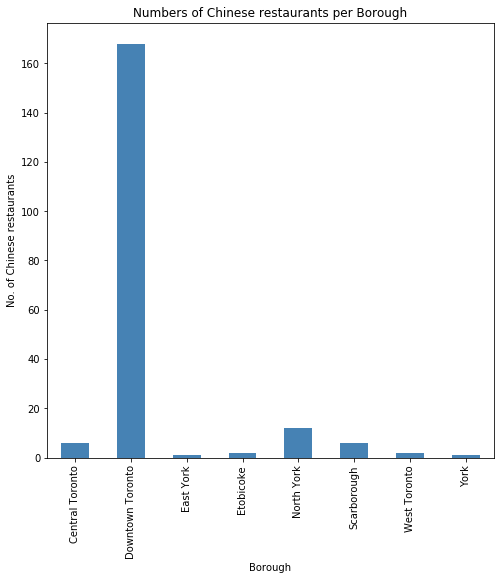

In [11]:
crestaurants_perBorough = venues_result.groupby('Borough')['Venue'].count()
display(crestaurants_perBorough)
crestaurants_perBorough.plot(kind='bar',figsize=(8,8), color='steelblue')
plt.xlabel('Borough') # add to x-label to the plot
plt.ylabel('No. of Chinese restaurants') # add y-label to the plot
plt.title('Numbers of Chinese restaurants per Borough') # add title to the plot
plt.show()

DowntownToronto has a huge lead over other borough in terms of numbers. Let see what the top 5 neighborhoods.

### Top 5 neighborhoods with Chinese restaurants

Neighborhood
Chinatown, Grange Park, Kensington Market    54
Central Bay Street                           19
First Canadian Place, Underground city       12
Ryerson, Garden District                     12
Commerce Court, Victoria Hotel               11
Name: Venue, dtype: int64

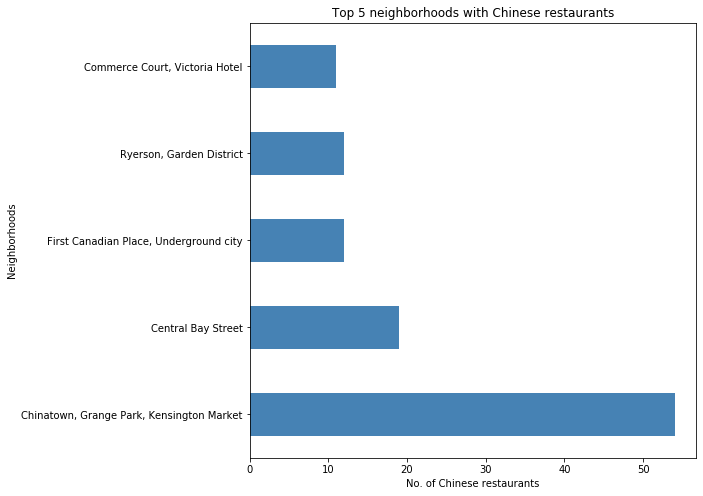

In [12]:
# find the top 5 neighborhoods with Chinese restaurants.

top5=5
top5_neighborhoods = venues_result.groupby('Neighborhood')['Venue'].count().nlargest(top5)
display(top5_neighborhoods)
top5_neighborhoods.plot(kind='barh',figsize=(8,8), color='steelblue')
plt.xlabel('No. of Chinese restaurants') # add to x-label to the plot
plt.ylabel('Neighborhoods') # add y-label to the plot
plt.title('Top 5 neighborhoods with Chinese restaurants') # add title to the plot
plt.show()

The top 5 neighborhoods with the most Chinese restaurants also within the Downtown Toronto borough.


### Conclusion

As the borough of Scarborough has the highest concentration of Chinese living there, it’s logical for the company to lure restaurants in Scarborough in joining the network first. However, based on the analysis, it clearly indicates most Chinese restaurants are located in Downtown Toronto neighborhoods. Downtown Toronto has wide lead over other boroughs and is the place to be for Chinese food. That’s suggests where do people get their Chinese food from. It’s critical for the food delivery platform to signs up more Chinese restaurants in downtown area as its partners even though most Chinese live in Scarborough. By signing up more Chinese restaurants in Downtown Toronto, it greatly expands the choice of menus and greater variety items for its app users to choose from.  As a final note, the analysis of this report is highly depended on the adequacy and accuracy of FourSquare’s data. A more comprehensive analysis and future work is needed to incorporate data from other external databases as well.
